In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:

import os
for dirname, _, filenames in os.walk('C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Diabetes Prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

C:\Users\Hp\Desktop\Applied AI\Kaggle\Diabetes Prediction\diabetes_data_upload.csv
C:\Users\Hp\Desktop\Applied AI\Kaggle\Diabetes Prediction\Diabetes_Prediction_RF.pkl


In [13]:
pwd

'C:\\Users\\Hp'

In [6]:
import os
os.chdir("C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Diabetes Prediction")

In [73]:
df = pd.read_csv('diabetes_data_upload.csv')

In [74]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

No null values are found

In [13]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [76]:
cat_feat = [feat for feat in df.columns if df[feat].dtypes == 'O']

In [77]:

num_feat = [feat for feat in df.columns if df[feat].dtypes != 'O']


In [78]:
cat_feat.remove('class')

## EDA 

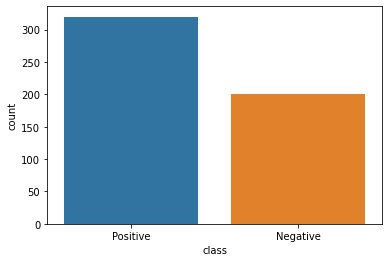

In [16]:
sns.countplot(data=df,x='class');

We have enough datapoints for both Positive and Negative classes -----> Balanced dataset  

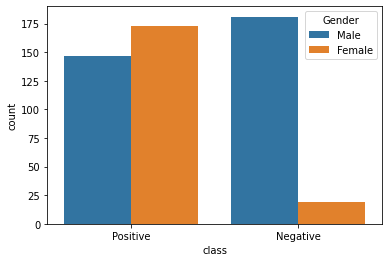

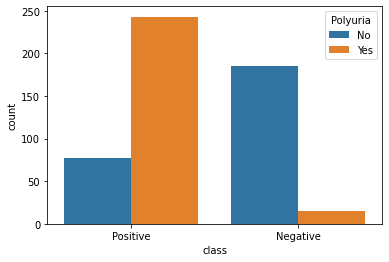

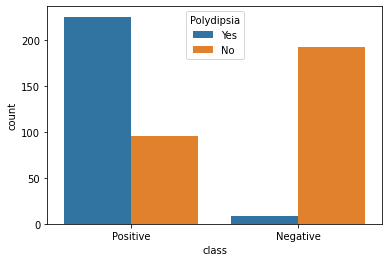

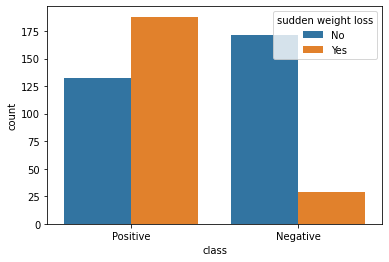

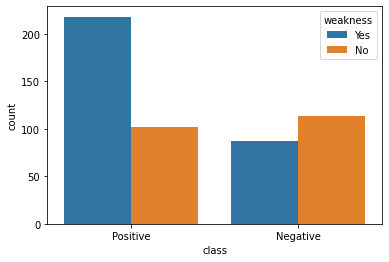

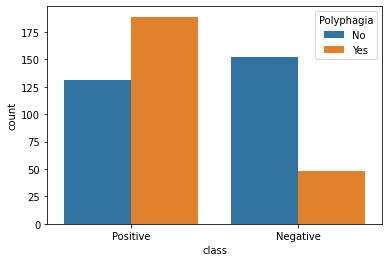

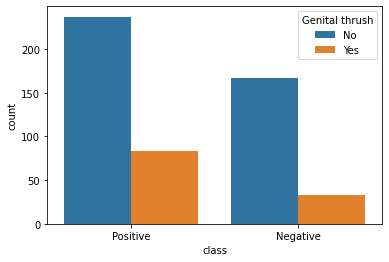

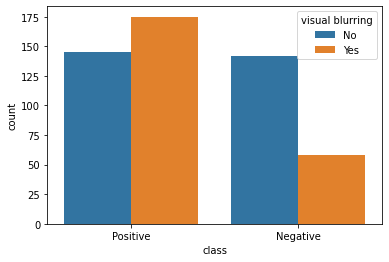

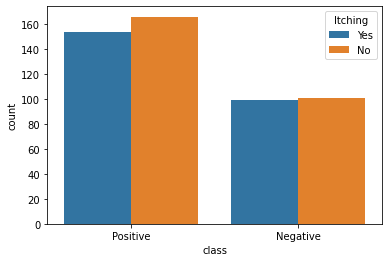

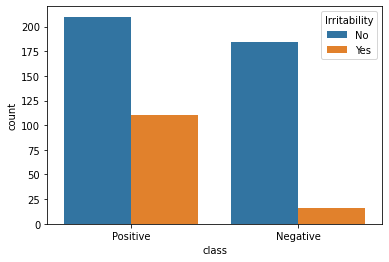

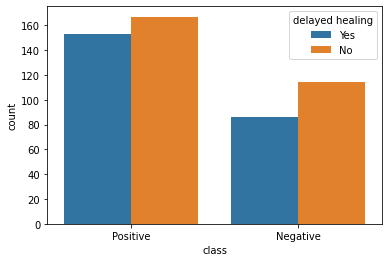

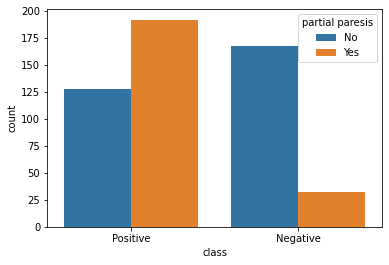

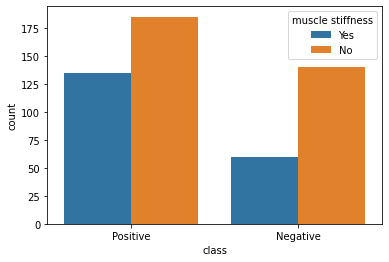

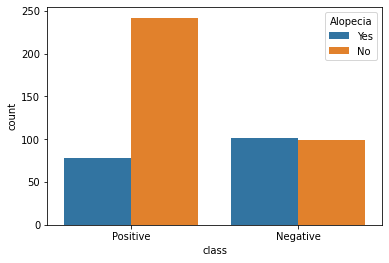

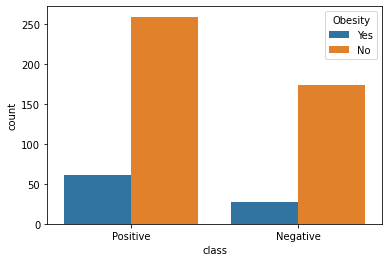

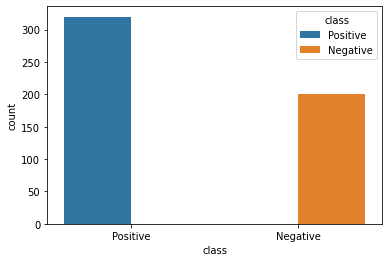

In [46]:
for i,col in enumerate(cat_feat):
            plt.figure(i)
            sns.countplot(data=df[cat_feat],x='class',hue=cat_feat[i])

From the above countplots, it can be observed that following features are highly varying among the positive and Negative class:

    1.Gender: Females with Positive class are much more than the Negative class. On research, it was not found that there is more occurence of Diabetes among women than men. So, this seems to be imbalanced for Female class.
    2.Polyuria
    3.Polydipsia
    4.Sudden Weight loss
    5.Genital thrush
    6.Irritability
    7.Partial Paresis
   

Let's explore the numerical feature 'Age'

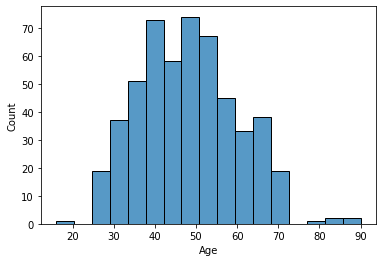

In [59]:
sns.histplot(data=df['Age']);

Distribution is Gaussian, as expected since Age tends to be normally distributed

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


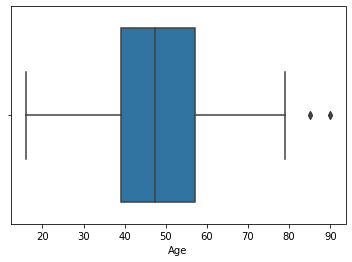

In [136]:
sns.boxplot(df['Age']);

There seems to be some outliers in Age feature. Let's study them more.

In [141]:
print(np.percentile(df['Age'],50))
print(np.percentile(df['Age'],90))
print(np.percentile(df['Age'],95))
print(np.percentile(df['Age'],99))
print(df['Age'].max())

47.5
65.0
68.0
72.0
90


In [142]:
df[df['Age']>72]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
113,79,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,1
185,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


In [40]:
plt.figure()
sns.countplot(data=df_clean['Polyuria'])
plt.figure()
sns.countplot(data=df_clean['Polydipsia'])
plt.figure()
sns.countplot(data=df_clean['Polyphagia'])
plt.figure()
sns.countplot(data=df_clean['sudden weight loss']) 

NameError: name 'df_clean' is not defined

<Figure size 432x288 with 0 Axes>

For Age>72(i.e. 99 percentile), Class is positive only, so removing this may lose some information.

So, will not consider these datapoints as outliers.

In [68]:
df.groupby(by='class').mean()['Age']


class
Negative    46.360000
Positive    49.071875
Name: Age, dtype: float64

Positive class mean is slightly higher

In [146]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80 and more"]
bins= [0,10,20,30,40,50,60,70,80,90]

In [157]:
freq_df = df['Age'].groupby(pd.cut(df['Age'],bins=bins,labels=labels)).size()

In [158]:
freq_df.head()

Age
Less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
Name: Age, dtype: int64

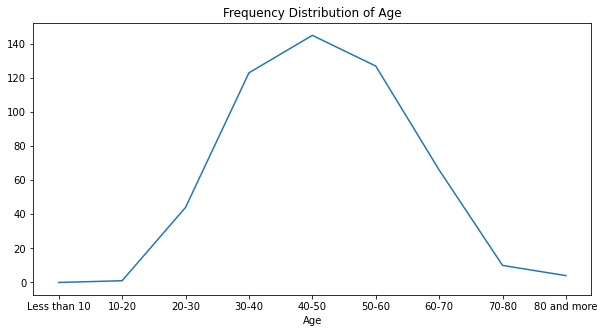

In [159]:
# Plot of Distribution of Data Per Gender
freq_df.plot(kind='line',figsize=(10,5))
plt.title("Frequency Distribution of Age")
plt.show()

#### Observation
Highest prevalence of Diabetes is from 40-50

#### Encoding of categorical variables

In [79]:
df2= df.copy()

In [80]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [81]:
for feat in cat_feat[1:]:
    df[feat] = np.where(df[feat]=='Yes',1,0)
    
    
df['Gender'] = np.where(df['Gender']=='Male',1,0)
df['class'] = np.where(df['class']=='Positive',1,0)   

In [82]:
df.groupby('Gender').mean()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Gender,,,,,,,,,,,,,,,,
0,47.031250,0.671875,0.651042,0.598958,0.666667,0.598958,0.109375,0.583333,0.520833,0.250000,0.526042,0.645833,0.432292,0.140625,0.171875,0.901042
1,48.612805,0.393293,0.329268,0.310976,0.539634,0.371951,0.289634,0.368902,0.466463,0.237805,0.420732,0.304878,0.341463,0.463415,0.167683,0.448171


In [49]:
df.groupby('class').mean()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
0,46.360000,0.905000,0.075000,0.040000,0.1450,0.43500,0.240000,0.165000,0.290000,0.49500,0.08000,0.430000,0.16,0.300000,0.50500,0.135000
1,49.071875,0.459375,0.759375,0.703125,0.5875,0.68125,0.590625,0.259375,0.546875,0.48125,0.34375,0.478125,0.60,0.421875,0.24375,0.190625


In [62]:
##Male-Positive
len(df[(df['class']==1) & (df['Gender']==1)])/len(df[df['Gender']==1])

0.4481707317073171

In [63]:
##Male-Negative
len(df[(df['class']==0) & (df['Gender']==1)])/len(df[df['Gender']==1])

0.551829268292683

In [64]:
##Female-Positive
len(df[(df['class']==1) & (df['Gender']==0)])/len(df[df['Gender']==0])

0.9010416666666666

In [66]:
##Female-Negative
len(df[(df['class']==0) & (df['Gender']==0)])/len(df[df['Gender']==0])

0.09895833333333333

### Handling class imbalance for Female gender

In [13]:
df_fem = df[df['Gender'] == 0]

In [14]:
df_fem.groupby('class').count()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
1,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173


In [21]:
X_fem = df_fem[df.columns[:-1]]
y_fem = df_fem['class']

In [25]:
X_train_ns,X_test_ns,y_train_ns,y_test_ns = train_test_split(X_fem,y_fem,test_size = 0.2)

### Let's do oversampling of Female minority class(i.e. class 0)

In [50]:
## Over sampling

from imblearn.over_sampling import RandomOverSampler
from collections import Counter


os=RandomOverSampler(0.9)
X_train_os,y_train_os=os.fit_resample(X_train_ns,y_train_ns)
print("The number of classes before fit {}".format(Counter(y_train_ns)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 139, 0: 14})
The number of classes after fit Counter({1: 139, 0: 125})


C:\Users\Hp\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [51]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier()
clf_2.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [52]:
clf_2.predict(X_test_ns)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

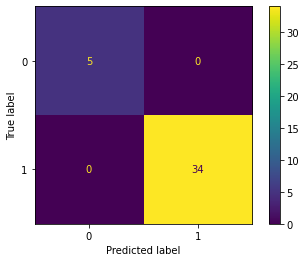

In [53]:
plot_confusion_matrix(clf_2,X_test_ns,y_test_ns);

It has not affected the predictions negatively.
Now let's use the new trainig set

In [64]:
df_female_X = pd.concat([X_train_os,X_test_ns],axis=0)

In [59]:
df_female_y = pd.concat([y_train_os,y_test_ns],axis=0)

In [67]:
df_female =  pd.concat([df_female_X,df_female_y],axis = 1)

In [68]:
df_female

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,55,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
1,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
2,35,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1
3,43,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
4,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
488,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
393,51,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
198,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1


Dropped Gender column as I found diabetes to be independent of the Gender

In [85]:
final_df = pd.concat([df[df['Gender']==1],df_female],axis=0)

In [86]:
final_df = final_df.drop('Gender',axis=1)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
488,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
393,51,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
198,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1


In [205]:
final_df

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
488,50,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
393,51,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
198,58,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1


In [90]:
## Saving the final dataset with Gender column

final_df.to_csv('final_oversampled.csv')

In [206]:
##n Saving final dataset without Gender column
final_df.to_csv('final_no_gender_oversampled.csv')

In [25]:
pwd

'C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Diabetes Prediction'

#### Correlation Analysis of Features

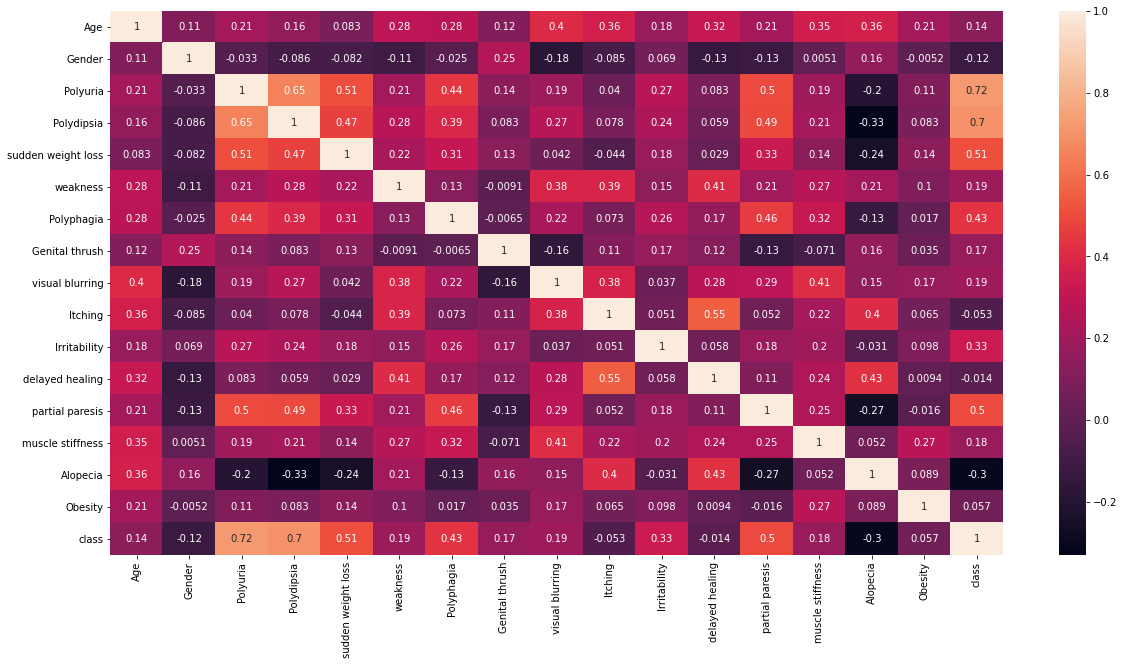

In [93]:
# Plot Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)
plt.show()

<AxesSubplot:>

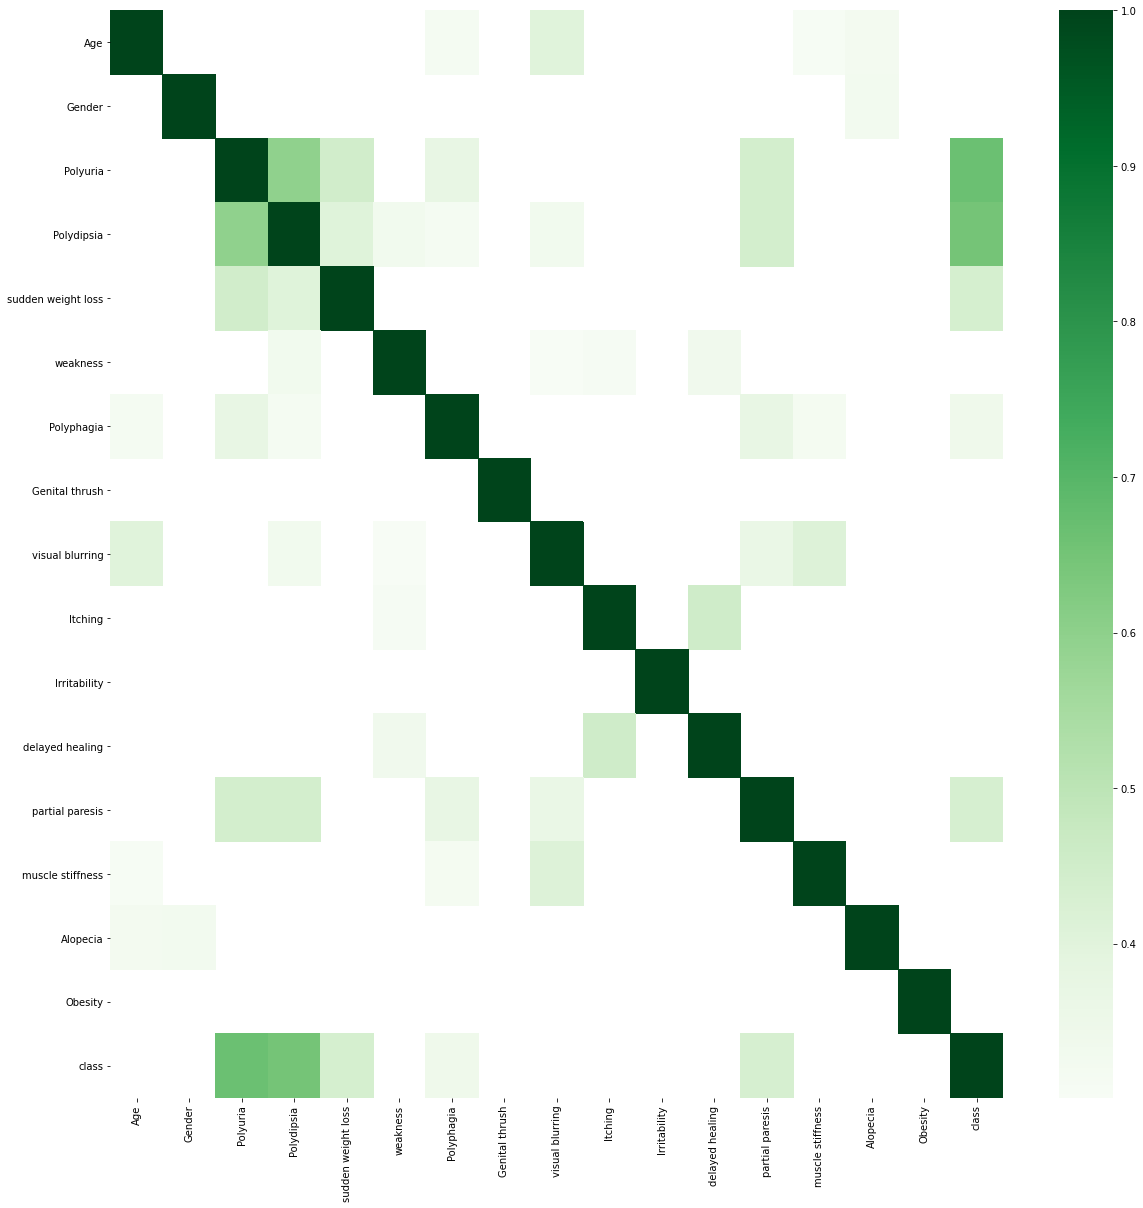

In [134]:
corr_matrix = final_df.corr()
highest_corr = corr_matrix[corr_matrix>=0.3]
plt.figure(figsize=(20,20))
sns.heatmap(highest_corr,cmap='Greens')

In [167]:
# List Features with the highest Correlation Coefficient
s = corr_matrix.abs().unstack()
top_features_per_correlation = s.sort_values(ascending=False)

In [180]:
top_features_per_correlation[top_features_per_correlation<1].head(30)

Polyuria            class                 0.665922
class               Polyuria              0.665922
                    Polydipsia            0.648734
Polydipsia          class                 0.648734
Polyuria            Polydipsia            0.598609
Polydipsia          Polyuria              0.598609
Itching             delayed healing       0.453316
delayed healing     Itching               0.453316
Gender              class                 0.449233
class               Gender                0.449233
sudden weight loss  Polyuria              0.447207
Polyuria            sudden weight loss    0.447207
Polydipsia          partial paresis       0.442249
partial paresis     Polydipsia            0.442249
                    Polyuria              0.441664
Polyuria            partial paresis       0.441664
class               sudden weight loss    0.436568
sudden weight loss  class                 0.436568
class               partial paresis       0.432288
partial paresis     class      

## Feature Selection

In [98]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [94]:
final_df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [95]:
len(final_df.columns)

17

In [207]:
X = final_df[final_df.columns[:-1]]
y = final_df[final_df.columns[-1]]

In [208]:
# Find the best features using Selectkbest

skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)

# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])
feature_column_names = pd.DataFrame(X.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

#Sorting 12 most important features according to their scores. 
best_feat_df.nlargest(12,'Feature_Scores')  

,Feature_Scores,Feature_name
2,195.995811,Polydipsia
1,195.076582,Polyuria
3,106.234470,sudden weight loss
11,100.558154,partial paresis
5,72.614199,Polyphagia
9,54.466137,Irritability
0,39.959810,Age
13,35.551460,Alopecia
6,14.641500,Genital thrush
12,13.102942,muscle stiffness


In [209]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()  

array(['Polydipsia', 'Polyuria', 'sudden weight loss', 'partial paresis',
       'Polyphagia', 'Irritability', 'Age', 'Alopecia', 'Genital thrush',
       'muscle stiffness', 'visual blurring', 'weakness'], dtype=object)

From our analysis, Polydipsia, Polyuria, Sudden weight loss, Partial paresis seem to be highly useful in making predictions

Lets check using Extra Trees Classifier also.

In [210]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [211]:
et_clf.feature_importances_

array([0.07335835, 0.22811775, 0.20286439, 0.09658868, 0.02454944,
       0.0462485 , 0.02180782, 0.03757028, 0.03439279, 0.03517513,
       0.03725534, 0.07962326, 0.0264574 , 0.03682779, 0.01916306])

In [212]:
ET_clf = pd.Series(et_clf.feature_importances_,index = X.columns)

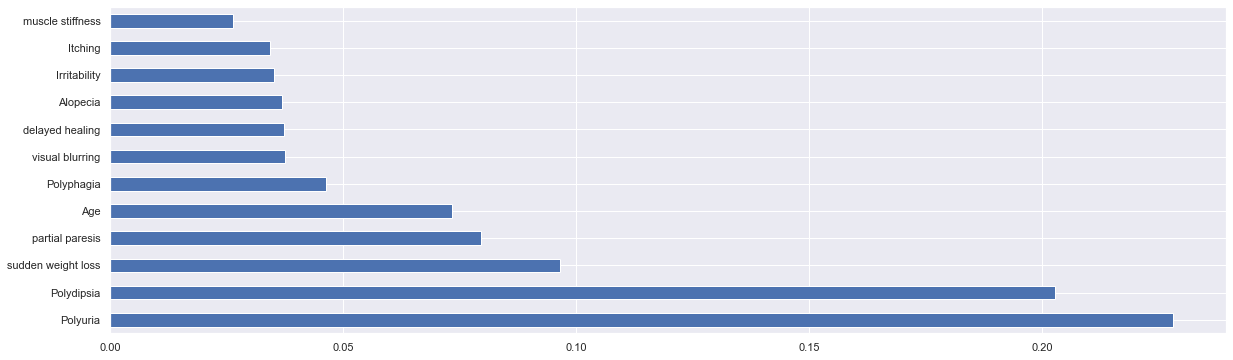

In [213]:
ET_clf.nlargest(12).plot(kind='barh');

Most important features are almost same according to both the algorithms(except for Gender and Sudden weight loss)

According to Extra Tress Classifier: Polyuria, Polydipsia, Sudden weight loss, Partial Paresis, Age, are the most importanat features 

According to SelectKBest : Polydipsia, Polyuria, sudden weight loss, partial paresis, Polydipsia
       

## Model Development

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score

#### Train Test Split 

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [216]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(504, 15)
(127, 15)
(504,)
(127,)


In [217]:
import sys
import warnings

#Ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

    
    
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=0)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Gradient Boost', GradientBoostingClassifier(random_state=0)])
models.append(['Light GBM', LGBMClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for i in range(len(models)):
    
    lst_2 = []
    model = models[i][1].fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    """Evaluate Model using cross validation of KFolds"""
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
    
    ## Evaluating Performace Metrics
    
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    F1_score = np.round(f1_score(y_test,y_pred),3)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    CV_score = np.mean(scores)
    roc = roc_auc_score(y_test, y_pred) 
    
    
    ## Appending in the list
    lst_2.append(models[i][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(scores.mean()*100)
    lst_2.append(scores.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(F1_score)
    lst_1.append(lst_2)
    
    print("--------------------------------------------{}------------------------------\n\n".format(models[i][0]))
    print(cm)
    print("\nAccuracy Score on Test : {}\n".format(np.round(accuracy_score(y_test,y_pred),3)))
    print("F1 Score : {}\n".format(np.round(f1_score(y_test,y_pred),3)))
    print("K- fold validation Mean Accuracy: {}  Standard_Deviation : {}\n\n".format(np.mean(scores), np.std(scores)))
  
    

--------------------------------------------Logistic Regression------------------------------


[[49  8]
 [ 9 61]]

Accuracy Score on Test : 0.866

F1 Score : 0.878

K- fold validation Mean Accuracy: 0.893874007936508  Standard_Deviation : 0.029894802899537224


--------------------------------------------SVM------------------------------


[[33 24]
 [18 52]]

Accuracy Score on Test : 0.669

F1 Score : 0.712

K- fold validation Mean Accuracy: 0.6385912698412698  Standard_Deviation : 0.03308215668726687


--------------------------------------------KNeighbors------------------------------


[[54  3]
 [11 59]]

Accuracy Score on Test : 0.89

F1 Score : 0.894

K- fold validation Mean Accuracy: 0.8892361111111111  Standard_Deviation : 0.07008984738987922


--------------------------------------------GaussianNB------------------------------


[[46 11]
 [ 8 62]]

Accuracy Score on Test : 0.85

F1 Score : 0.867

K- fold validation Mean Accuracy: 0.8906498015873016  Standard_Deviation : 0.0428

In [218]:
report = pd.DataFrame(lst_1,columns = ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [219]:
report.nlargest(11,'F1')

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
10,Light GBM,98.425197,97.626488,2.373605,0.985714,1.000000,0.971429,0.986
6,Random Forest,97.637795,97.941468,2.011377,0.976942,0.985507,0.971429,0.978
7,Extra Tree,97.637795,97.948909,2.633551,0.976942,0.985507,0.971429,0.978
9,Gradient Boost,97.637795,95.882937,3.763897,0.978571,1.000000,0.957143,0.978
11,XGBoost,97.637795,97.467758,2.572738,0.978571,1.000000,0.957143,0.978
5,Decision Tree,96.062992,96.991567,2.396713,0.962657,0.985075,0.942857,0.964
8,AdaBoost,89.763780,87.490079,4.241219,0.897368,0.913043,0.900000,0.906
2,KNeighbors,88.976378,88.923611,7.008985,0.895113,0.951613,0.842857,0.894
4,BernoulliNB,87.401575,88.913690,3.516669,0.872682,0.885714,0.885714,0.886
0,Logistic Regression,86.614173,89.387401,2.989480,0.865539,0.884058,0.871429,0.878


We can see that Tree based models have performed extremely well. Random Forest being the best on accuracy score and Std. Deviation.
Important thing to note in this problem is that Accuracy only as a performance metric is not good enough.


Here, at any cost we don't want to predict a high risk patient to be at no risk. So, with accuracy, minimizing False Negatives is crucial. 
Hence, we will focus on Recall(Sensitivity) and F1 score.  




📌 Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
                 
                 Accuracy = TP+TN/TP+FP+FN+TN

📌 Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
                
                Precision = TP/TP+FP

📌 Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
                 
                 Recall = TP/TP+FN

📌 F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
                 
                 F1 Score = 2(Recall Precision) / (Recall + Precision)
                 
                 
                 

Light GBM


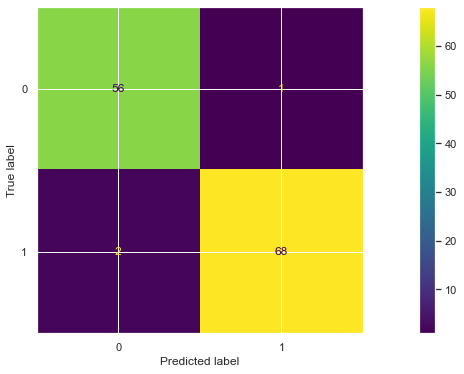

In [221]:
# Plot Confusion Matrix for Extra Tress Classifier
print(models[10][0])
plot_confusion_matrix(models[7][1],X_test,y_test);

As per observation, Extra Tress Classifier or Extremely randomized Trees has performed the best with no wrong prediction. 

Its two main differences with other tree-based ensemble methods are:
1. It splits nodes by choosing cut-points fully at random. 
2. It uses the whole learning sample (rather than a bootstrap replica) to grow the trees.



### So, we will use Extra Trees Classifier as our final model. 

In [222]:
final_model = models[10][1]

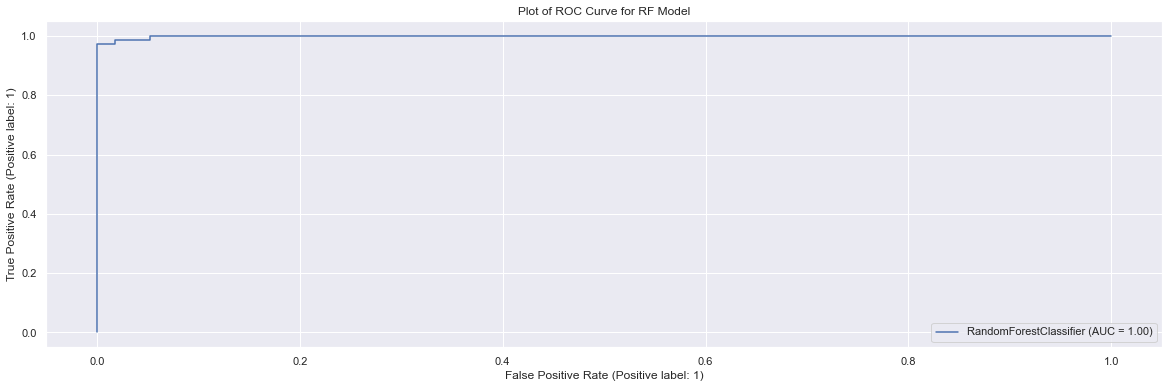

In [223]:
# ROC Curve
plot_roc_curve(models[6][1], X_test, y_test)
plt.title("Plot of ROC Curve for RF Model")
plt.show()

Ideally ROC score should be near to 1. 


In [224]:
importances = final_model.feature_importances_

In [225]:
imp_df = pd.DataFrame(importances,columns=["Importance"],index = X_test.columns).sort_values(by='Importance',ascending=False)

<AxesSubplot:ylabel='Importance'>

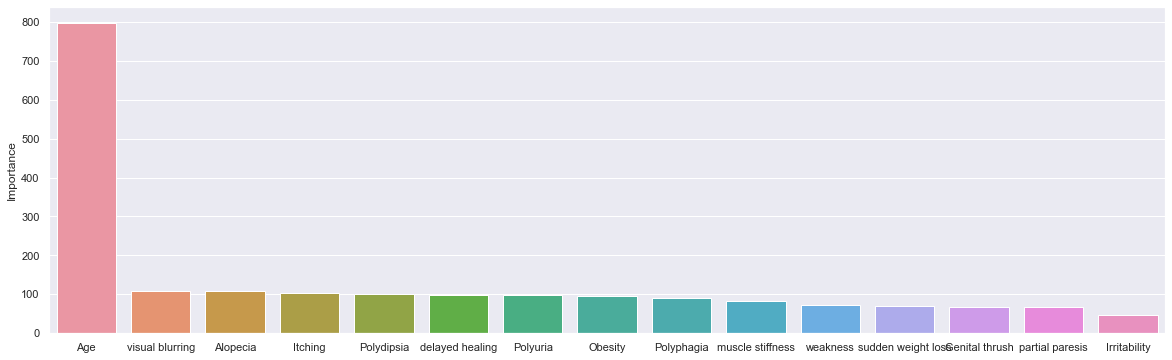

In [226]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=imp_df,x=imp_df.index,y='Importance')

In [143]:
imp_df.to_csv('Feature_importance.csv')

Now let us train our model on whole dataset(including Test Data also)

In [227]:
LGBM = LGBMClassifier(random_state=0)
LGBM.fit(X,y)

LGBMClassifier(random_state=0)

https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/#:~:text=LightGBM%20(Light%20Gradient%20Boosting%20Machine,Analysis%20of%20Algorithms

In [144]:
Extra_trees_model = ExtraTreesClassifier(random_state=0)
Extra_trees_model.fit(X,y)

ExtraTreesClassifier(random_state=0)

In [145]:
Extra_trees_model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [228]:
LGBM.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [196]:
final_df.columns

Index(['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [231]:
Extra_trees_model.predict(np.array([35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))[0]

1

## Saving the model

In [45]:
import joblib


In [153]:
# Save Extra Trees Model

joblib.dump(Extra_trees_model,'Diabetes_Prediction_Extra_Trees.pkl')


['Diabetes_Prediction_Extra_Trees.pkl']

In [229]:
## Save LGBM Model
joblib.dump(LGBM,'Diabetes_Prediction_LGBM.pkl')

['Diabetes_Prediction_LGBM.pkl']

In [230]:
## Load the model
loaded_model = joblib.load('Diabetes_Prediction_LGBM.pkl') 

### Predicting probabilities

In [156]:
probabilities = loaded_model.predict_proba(X_test)

In [157]:
probabilities[0][1]*100

0.0

In [158]:
np.array(X_test)

array([[36,  1,  0, ...,  0,  0,  0],
       [28,  0,  0, ...,  1,  0,  0],
       [35,  0,  1, ...,  0,  0,  0],
       ...,
       [48,  1,  1, ...,  0,  0,  0],
       [47,  1,  1, ...,  1,  0,  0],
       [40,  1,  0, ...,  1,  0,  0]], dtype=int64)

In [159]:
probabilities

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [160]:
loaded_model.predict_proba(np.array(X_test[0:1]))[0][0]

1.0

In [161]:
pd.set_option("display.max_rows",100)
final_df[(final_df['Gender']==0) & (final_df['Age']>37) & (final_df['class']==1)].sort_values(by='Age').head(100)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
69,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
65,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
31,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
73,38,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
77,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
18,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
142,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
34,39,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
91,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
78,39,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1


In [178]:
final_df[(final_df['Age']!=35) | (final_df.index!=38)]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
488,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
393,51,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
198,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1


In [183]:
final_df[(final_df['Age']==35) & (final_df.index==30)]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
30,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [185]:
final_df[(final_df['Age']==35) & (final_df['class']==1) & (final_df.index==30)] 
         

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
30,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [181]:
pd.set_option("display.max_rows",400)
final_df[(final_df['class']==1)].head(400)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [177]:
len(final_df)

631

In [172]:
final_df[final_df.index==38]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
38,35,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
38,48,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1


In [188]:
pd.set_option("display.max_rows",350)
final_df[final_df['class']==0].head(350)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
200,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0
201,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
202,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,67,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0
206,60,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
207,58,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
208,54,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0
209,43,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
